# Autocorrelation operator estimation

In this notebook we derive the analytical formula for the autocorrelation operator.

## Testing the small-signal approximation model

### Exact model

In [1]:
import numpy as np 
from scipy.stats import norm, halfnorm
from matplotlib import pyplot as plt

In [2]:
def yn(the_i, ynf, u0, tc, t):
    return (
    np.tan(the_i) * u0 * t
    + (3 * ynf - 2 * u0 * tc * np.tan(the_i))/np.square(u0 * tc) * np.square(u0 * t)
    + (u0 * tc * np.tan(the_i) - 2 * ynf)/np.power(u0 * tc, 3) * np.power(u0 * t, 3))

In [7]:
samples_the_i = halfnorm.rvs(loc=0., scale=0.05, size=100)
samples_ynf = norm.rvs(loc=25., scale=1., size=100)
u0 = 40.
samples_tc = norm.rvs(loc=8., scale=1., size=100)
t = np.arange(0., 15., 0.1)

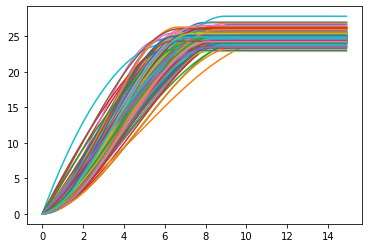

In [13]:
lcdts = np.zeros((100, t.shape[0]))
for i in range(100):
    ts = np.zeros_like(t)
    for j in range(t.shape[0]):
        if j <= samples_tc[i] * 10:
            ts[j] = yn(samples_the_i[i], samples_ynf[i], u0, samples_tc[i], t[j])
        else:
            ts[j] = ts[j-1]
    plt.plot(t, ts)
    lcdts[i,:] = ts

## Karhunen-Loeve Basis for Lanechanging Stochastic Process

In [11]:
import sklearn
import skfda
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA

In [14]:
lcd = skfda.FDataGrid(lcdts, t)

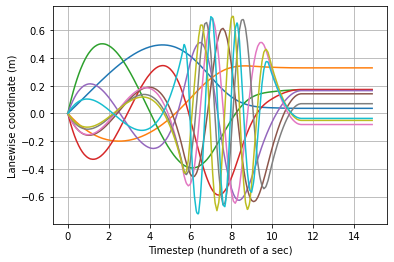

In [19]:
fpca_discretized = FPCA(n_components=10)
fpca_discretized.fit(lcd)
fpca_discretized.components_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Lanewise coordinate (m)')
plt.grid(True)
print('')

<BarContainer object of 10 artists>

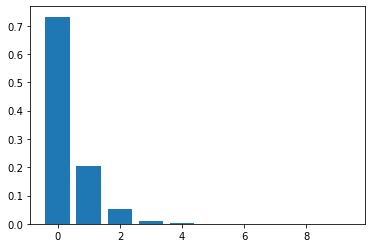

In [23]:
plt.bar(np.arange(10),fpca_discretized.explained_variance_ratio_)